# Problem Statement ## Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:
    
    - Customer details (gender, age, region etc.)
    - Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## Data Dictionary

### Train Data

__Variable__         __:__                 __Definition__

ID                   __:__             Unique Identifier for a row

Gender               __:__             Gender of the Customer

Age                  __:__            Age of the Customer (in Years)

Region_Code          __:__            Code of the Region for the customers

Occupation           __:__            Occupation Type for the customer

Channel_Code         __:__            Acquisition Channel Code for the Customer  (Encoded)

Vintage              __:__            Vintage for the Customer (In Months)

Credit_Product       __:__            If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

Avg_Account_Balance  __:__             Average Account Balance for the Customer in last 12 Months

Is_Active            __:__            If the Customer is Active in last 3 Months

Is_Lead(Target)      __:__            If the Customer is interested for the Credit Card
                                  0 : Customer is not interested
                                  1 : Customer is interested



### Test Data

__Variable__         __:__                 __Definition__

ID                   __:__             Unique Identifier for a row

Gender               __:__             Gender of the Customer

Age                  __:__            Age of the Customer (in Years)

Region_Code          __:__            Code of the Region for the customers

Occupation           __:__            Occupation Type for the customer

Channel_Code         __:__            Acquisition Channel Code for the Customer  (Encoded)

Vintage              __:__            Vintage for the Customer (In Months)

Credit_Product       __:__            If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

Avg_Account_Balance  __:__             Average Account Balance for the Customer in last 12 Months

Is_Active            __:__            If the Customer is Active in last 3 Months

### Sample Submission
This file contains the exact submission format for the predictions. Please submit CSV file only.

__Variable__   __:__ 	__Definition__

ID             __:__	Unique Identifier for a row

Is_Lead	(Target)__:__   Probability of Customer showing interest (class 1)


### Table of Content

- Step 1: Importing the Relevant Libraries

- Step 2: Data Inspection

- Step 3: Data Cleaning

- Step 4: Exploratory Data Analysis

- Step 5: Building Model

- Submission

# Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Inspetion

In [51]:
# loading dataset
# train dataset in Train df
# test dataset in Test df
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

In [52]:
# Checking no. of rows and columns in Train data
train.shape

(245725, 11)

- We have 245725 rows and 11 column in Train Dataset

In [53]:
# Checking no. of rows and columns in Test data
test.shape

(105312, 10)

- We have 105313 rows and 10 column in test set


In [54]:
#Taking look at first few entries in Train Data
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [55]:
#Taking look at first few entries in Test Data.
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


- By looking at Train and Test data, we have some categorical features.
- Also Is_Lead is our target feature which we need to predict for Test data.
- We are having some missing values too can bee seen in Test data.

#### Checking for Missing/Null values in both the dataset(Train & Test)

In [56]:
# checking percentage of null values in respective columns from train dataset
train.isnull().sum()/train.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

- From the insight above we have approx 12% of missing value in column "Credit_Product" in Train Dataset.

In [57]:
# checking percentage of null values in respective columns from test dataset
test.isnull().sum()/test.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

- Similarly in test dataset also we have approx 12% of missing value in column "Credit_Product".

#### Checking the no. of categorical & numerical feature in Train & Test Dataset

In [58]:
# checking categorical feature in train dataset:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [59]:
# checking categorical feature in test dataset:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


# Data Prepration/Data Cleaning

In [60]:
# Checking the total no of missing values in Train dataset
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

- Total of 29325 values are null out of 245725 values in Train dataset

In [61]:
# Checking the total no of missing values in Test dataset
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

- Total of 12522 values are null out of 105312 Values in test set

In [62]:
# Creating a new dataframe df similar to train dataset
df=train

In [63]:
# Checking the counts of different tpes of value in feature "Credit_Product"
df['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

- Can be seen that "No" is most frequent
- Imputing the missing values in Train dataset with most frequent occuring value i.e "No"

In [64]:
#using SimpleImputer Function to imput the missing value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['Credit_Product']])
df[['Credit_Product']] = imputer.transform(df[['Credit_Product']])

In [65]:
#Checking for missing values after imputation
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

- There is no null values now as we have imputed them with most frequent value.

In [66]:
# Checking the counts of different tpes of value in Target feature "Is_Lead"
df['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

- It shows that our dataset is Imbalanced
- So we we train our model with the same, It will be biased towards 0 target
- Will use __OverSampling__ Technique for this

In [67]:
# Creating a new dataframe with value of Target Feature("Is_Lead") equal to 1
onedf=df[df['Is_Lead']==1]

In [68]:
onedf['Is_Lead'].value_counts()

1    58288
Name: Is_Lead, dtype: int64

In [69]:
#Appending the newly created dataframe "onedf" to df
df=df.append(onedf).append(onedf)

- Appending newly created dataframe with entries having only 1 in "Is_Lead" feature to "df"
- This is done to avoid Biasing of prediction

In [70]:
# Checking the counts of different tpes of value in Target feature "Is_Lead"
df['Is_Lead'].value_counts()

0    187437
1    174864
Name: Is_Lead, dtype: int64

- now data is almost balanced

#### Imputin missing value in Test set too with same strategy used in Train set.

In [71]:
# Creating a new dataframe df similar to train dataset
df1=test

In [72]:
##using SimpleImputer Function to imput the missing value
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer1.fit(df1[['Credit_Product']])
df1[['Credit_Product']] = imputer1.transform(df1[['Credit_Product']])

In [73]:
df1.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

- There is no null values in Test set now as we have imputed them with most frequent value.

# Exploratory Data Analysis

In [74]:
#Checking the column names in Dataframe
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [75]:
# checking how many different types of values are there in Gender feature
df['Gender'].value_counts()

Male      205363
Female    156938
Name: Gender, dtype: int64

In [76]:
# checking how many different types of values are there in Occupation feature
df['Occupation'].value_counts()

Self_Employed    156568
Other            104551
Salaried          94991
Entrepreneur       6191
Name: Occupation, dtype: int64

In [77]:
# checking how many different types of values are there in Channel_Code feature
df['Channel_Code'].value_counts()

X1    122682
X3    119150
X2    112140
X4      8329
Name: Channel_Code, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

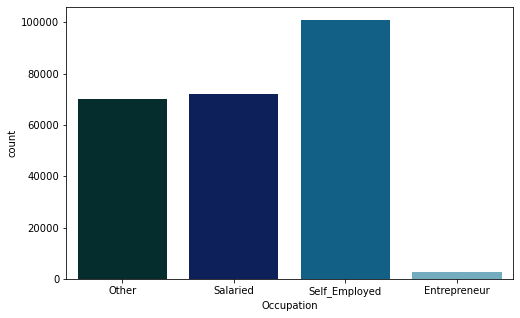

In [78]:
# plotting Occupation Feature to gain Insight
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='ocean')

- Most of the customers self_Employed, While customers with occupation as Others & Salaried are almost equal, where as customers who Entreprenuer are very few as compared to rest.

<AxesSubplot:xlabel='Gender', ylabel='count'>

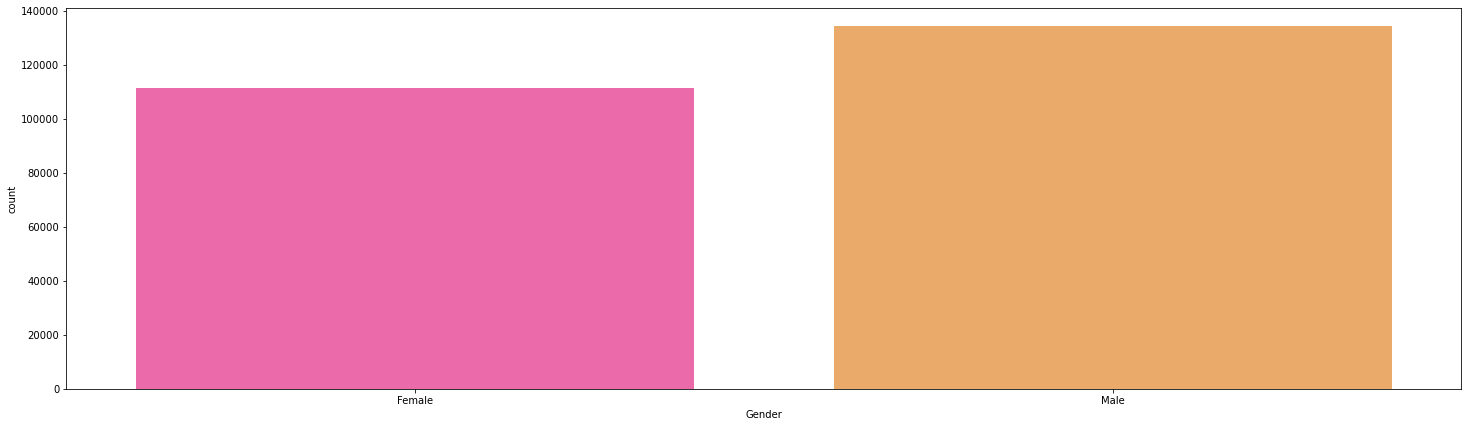

In [79]:
# plotting Gender Feature to gain Insight
plt.figure(figsize=(25,7))
sns.countplot('Gender',data=train,palette='spring')

- Males customers are more as compared to Female

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

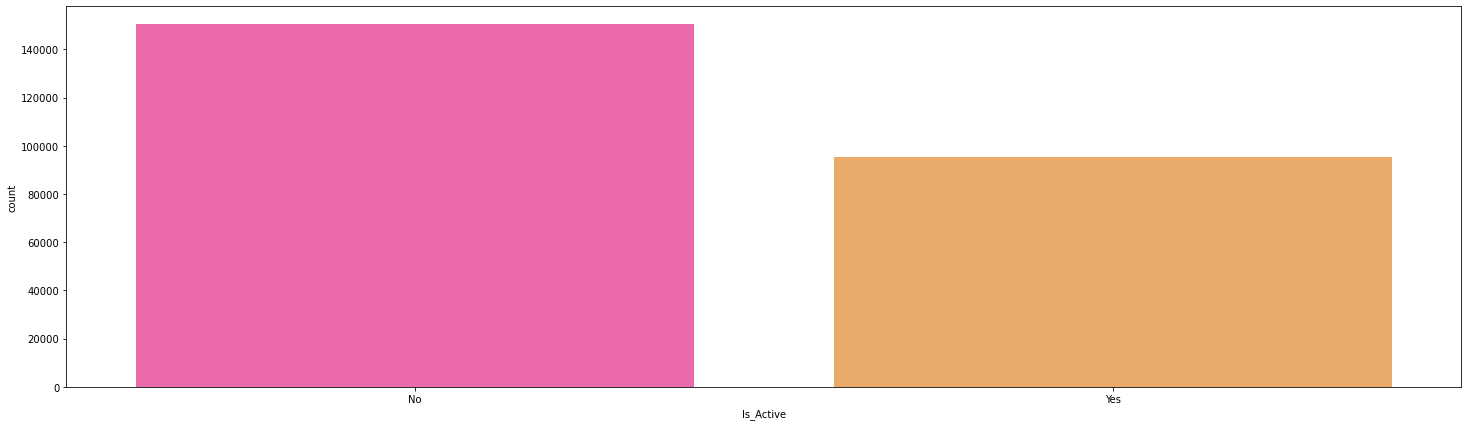

In [80]:
# plotting Is_Active Feature to gain Insight
plt.figure(figsize=(25,7))
sns.countplot('Is_Active',data=train,palette='spring')

- Max No of users are Inactive since last three months

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

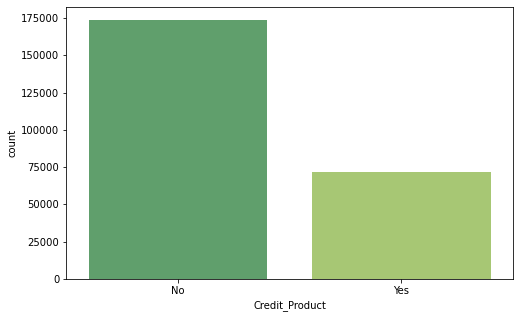

In [81]:
# plotting Credit_Product Feature to gain Insight
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train,palette='summer')

- Max no of customers in bank have no active credit product(i.e. Loans etc)

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

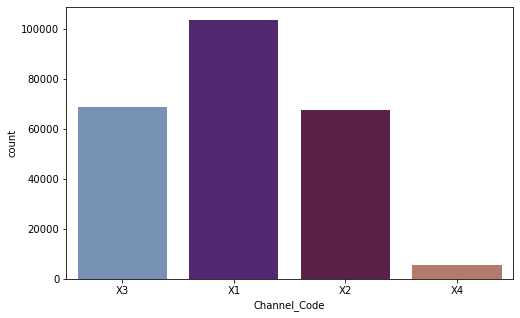

In [82]:
# plotting Gender Feature to gain Insight
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train,palette='twilight')

- channel code 1 count is more

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

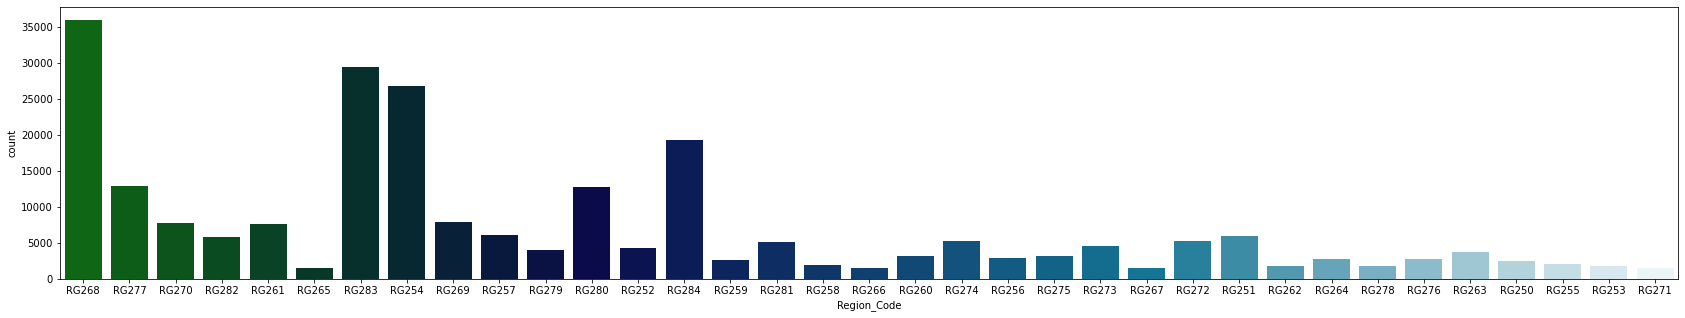

In [83]:
# plotting Gender Feature to gain Insight
plt.figure(figsize=(29,5))
sns.countplot('Region_Code',data=train,palette='ocean')

# Building Model

In [84]:
#  Using Labelencoder to encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns
for i in var_mod:
    df[i] = le.fit_transform(df[i])    

for i in var_mod:
    df1[i] = le.fit_transform(df1[i])

- Encoding the categorical features for model training purpose using label encode function from scikit learn

#### Separating target Feature & Independent Features

In [85]:
# Seperate Features and Target
X= df.drop(columns = ['Is_Lead'], axis=1)
y= df['Is_Lead']

#### splitting the train Dataset in to train and validation

In [86]:
# 20% data as validation set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [87]:
#scaling the faeture so that all feature are on same scale
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_valid = preprocessing.scale(X_valid)

#### Training CatBoostClassifier

In [88]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.115951
0:	learn: 0.6679235	total: 298ms	remaining: 4m 57s
1:	learn: 0.6483612	total: 597ms	remaining: 4m 58s
2:	learn: 0.6272271	total: 805ms	remaining: 4m 27s
3:	learn: 0.6154797	total: 1.06s	remaining: 4m 24s
4:	learn: 0.6064217	total: 1.33s	remaining: 4m 24s
5:	learn: 0.5990206	total: 1.5s	remaining: 4m 8s
6:	learn: 0.5901660	total: 1.69s	remaining: 4m
7:	learn: 0.5863603	total: 1.86s	remaining: 3m 50s
8:	learn: 0.5808195	total: 2.06s	remaining: 3m 46s
9:	learn: 0.5777258	total: 2.29s	remaining: 3m 46s
10:	learn: 0.5751091	total: 2.44s	remaining: 3m 39s
11:	learn: 0.5731692	total: 2.6s	remaining: 3m 34s
12:	learn: 0.5714359	total: 2.75s	remaining: 3m 28s
13:	learn: 0.5675271	total: 2.94s	remaining: 3m 26s
14:	learn: 0.5664337	total: 3.08s	remaining: 3m 22s
15:	learn: 0.5655070	total: 3.26s	remaining: 3m 20s
16:	learn: 0.5643705	total: 3.48s	remaining: 3m 21s
17:	learn: 0.5637455	total: 3.64s	remaining: 3m 18s
18:	learn: 0.5622047	total: 3.82s	remaining: 3m 17s

159:	learn: 0.5447608	total: 34.9s	remaining: 3m 3s
160:	learn: 0.5447014	total: 35.1s	remaining: 3m 2s
161:	learn: 0.5446532	total: 35.2s	remaining: 3m 2s
162:	learn: 0.5446052	total: 35.4s	remaining: 3m 1s
163:	learn: 0.5445589	total: 35.6s	remaining: 3m 1s
164:	learn: 0.5444857	total: 35.8s	remaining: 3m 1s
165:	learn: 0.5444368	total: 36s	remaining: 3m
166:	learn: 0.5443986	total: 36.1s	remaining: 3m
167:	learn: 0.5443444	total: 36.3s	remaining: 2m 59s
168:	learn: 0.5442814	total: 36.5s	remaining: 2m 59s
169:	learn: 0.5442401	total: 36.7s	remaining: 2m 59s
170:	learn: 0.5441991	total: 36.9s	remaining: 2m 58s
171:	learn: 0.5441426	total: 37s	remaining: 2m 58s
172:	learn: 0.5440993	total: 37.2s	remaining: 2m 57s
173:	learn: 0.5440484	total: 37.4s	remaining: 2m 57s
174:	learn: 0.5439774	total: 37.5s	remaining: 2m 56s
175:	learn: 0.5439329	total: 37.8s	remaining: 2m 56s
176:	learn: 0.5438981	total: 37.9s	remaining: 2m 56s
177:	learn: 0.5438441	total: 38.1s	remaining: 2m 56s
178:	learn:

315:	learn: 0.5376192	total: 1m 3s	remaining: 2m 16s
316:	learn: 0.5375803	total: 1m 3s	remaining: 2m 16s
317:	learn: 0.5375388	total: 1m 3s	remaining: 2m 15s
318:	learn: 0.5375041	total: 1m 3s	remaining: 2m 15s
319:	learn: 0.5374654	total: 1m 3s	remaining: 2m 15s
320:	learn: 0.5374141	total: 1m 3s	remaining: 2m 15s
321:	learn: 0.5373643	total: 1m 4s	remaining: 2m 14s
322:	learn: 0.5373352	total: 1m 4s	remaining: 2m 14s
323:	learn: 0.5372944	total: 1m 4s	remaining: 2m 14s
324:	learn: 0.5372512	total: 1m 4s	remaining: 2m 14s
325:	learn: 0.5372164	total: 1m 4s	remaining: 2m 14s
326:	learn: 0.5371790	total: 1m 4s	remaining: 2m 13s
327:	learn: 0.5371451	total: 1m 5s	remaining: 2m 13s
328:	learn: 0.5371175	total: 1m 5s	remaining: 2m 13s
329:	learn: 0.5370800	total: 1m 5s	remaining: 2m 13s
330:	learn: 0.5370374	total: 1m 5s	remaining: 2m 12s
331:	learn: 0.5370106	total: 1m 5s	remaining: 2m 12s
332:	learn: 0.5369716	total: 1m 6s	remaining: 2m 12s
333:	learn: 0.5369266	total: 1m 6s	remaining: 

470:	learn: 0.5319228	total: 1m 31s	remaining: 1m 42s
471:	learn: 0.5318806	total: 1m 31s	remaining: 1m 42s
472:	learn: 0.5318489	total: 1m 31s	remaining: 1m 41s
473:	learn: 0.5318100	total: 1m 31s	remaining: 1m 41s
474:	learn: 0.5317895	total: 1m 31s	remaining: 1m 41s
475:	learn: 0.5317587	total: 1m 32s	remaining: 1m 41s
476:	learn: 0.5317210	total: 1m 32s	remaining: 1m 41s
477:	learn: 0.5316727	total: 1m 32s	remaining: 1m 40s
478:	learn: 0.5316379	total: 1m 32s	remaining: 1m 40s
479:	learn: 0.5316038	total: 1m 32s	remaining: 1m 40s
480:	learn: 0.5315573	total: 1m 32s	remaining: 1m 40s
481:	learn: 0.5315195	total: 1m 33s	remaining: 1m 40s
482:	learn: 0.5314684	total: 1m 33s	remaining: 1m 39s
483:	learn: 0.5314355	total: 1m 33s	remaining: 1m 39s
484:	learn: 0.5313986	total: 1m 33s	remaining: 1m 39s
485:	learn: 0.5313612	total: 1m 33s	remaining: 1m 39s
486:	learn: 0.5313303	total: 1m 33s	remaining: 1m 39s
487:	learn: 0.5312829	total: 1m 34s	remaining: 1m 38s
488:	learn: 0.5312539	total:

622:	learn: 0.5267486	total: 1m 59s	remaining: 1m 12s
623:	learn: 0.5267202	total: 1m 59s	remaining: 1m 12s
624:	learn: 0.5266829	total: 2m	remaining: 1m 12s
625:	learn: 0.5266492	total: 2m	remaining: 1m 11s
626:	learn: 0.5266107	total: 2m	remaining: 1m 11s
627:	learn: 0.5265894	total: 2m	remaining: 1m 11s
628:	learn: 0.5265453	total: 2m	remaining: 1m 11s
629:	learn: 0.5265125	total: 2m 1s	remaining: 1m 11s
630:	learn: 0.5264746	total: 2m 1s	remaining: 1m 10s
631:	learn: 0.5264517	total: 2m 1s	remaining: 1m 10s
632:	learn: 0.5264179	total: 2m 2s	remaining: 1m 10s
633:	learn: 0.5263798	total: 2m 2s	remaining: 1m 10s
634:	learn: 0.5263495	total: 2m 2s	remaining: 1m 10s
635:	learn: 0.5263199	total: 2m 2s	remaining: 1m 10s
636:	learn: 0.5262933	total: 2m 3s	remaining: 1m 10s
637:	learn: 0.5262650	total: 2m 3s	remaining: 1m 9s
638:	learn: 0.5262287	total: 2m 3s	remaining: 1m 9s
639:	learn: 0.5261953	total: 2m 3s	remaining: 1m 9s
640:	learn: 0.5261618	total: 2m 3s	remaining: 1m 9s
641:	learn

779:	learn: 0.5219944	total: 2m 29s	remaining: 42.1s
780:	learn: 0.5219565	total: 2m 29s	remaining: 41.9s
781:	learn: 0.5219327	total: 2m 29s	remaining: 41.7s
782:	learn: 0.5219022	total: 2m 29s	remaining: 41.5s
783:	learn: 0.5218727	total: 2m 30s	remaining: 41.3s
784:	learn: 0.5218492	total: 2m 30s	remaining: 41.1s
785:	learn: 0.5218126	total: 2m 30s	remaining: 41s
786:	learn: 0.5217861	total: 2m 30s	remaining: 40.8s
787:	learn: 0.5217625	total: 2m 30s	remaining: 40.6s
788:	learn: 0.5217346	total: 2m 30s	remaining: 40.4s
789:	learn: 0.5217115	total: 2m 31s	remaining: 40.2s
790:	learn: 0.5216857	total: 2m 31s	remaining: 40s
791:	learn: 0.5216467	total: 2m 31s	remaining: 39.8s
792:	learn: 0.5216117	total: 2m 31s	remaining: 39.6s
793:	learn: 0.5215856	total: 2m 31s	remaining: 39.4s
794:	learn: 0.5215630	total: 2m 32s	remaining: 39.2s
795:	learn: 0.5215205	total: 2m 32s	remaining: 39s
796:	learn: 0.5214902	total: 2m 32s	remaining: 38.8s
797:	learn: 0.5214587	total: 2m 32s	remaining: 38.6s

935:	learn: 0.5174971	total: 2m 57s	remaining: 12.1s
936:	learn: 0.5174467	total: 2m 57s	remaining: 11.9s
937:	learn: 0.5174286	total: 2m 57s	remaining: 11.8s
938:	learn: 0.5173983	total: 2m 58s	remaining: 11.6s
939:	learn: 0.5173719	total: 2m 58s	remaining: 11.4s
940:	learn: 0.5173413	total: 2m 58s	remaining: 11.2s
941:	learn: 0.5173187	total: 2m 58s	remaining: 11s
942:	learn: 0.5172925	total: 2m 58s	remaining: 10.8s
943:	learn: 0.5172599	total: 2m 59s	remaining: 10.6s
944:	learn: 0.5172317	total: 2m 59s	remaining: 10.4s
945:	learn: 0.5171894	total: 2m 59s	remaining: 10.2s
946:	learn: 0.5171592	total: 2m 59s	remaining: 10.1s
947:	learn: 0.5171314	total: 2m 59s	remaining: 9.86s
948:	learn: 0.5171025	total: 2m 59s	remaining: 9.67s
949:	learn: 0.5170812	total: 3m	remaining: 9.48s
950:	learn: 0.5170474	total: 3m	remaining: 9.29s
951:	learn: 0.5170158	total: 3m	remaining: 9.1s
952:	learn: 0.5169898	total: 3m	remaining: 8.91s
953:	learn: 0.5169548	total: 3m	remaining: 8.72s
954:	learn: 0.51

In [89]:
#Predicting the output on validation set
y_pred = classifier.predict(X_valid)

In [90]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

##### Validating The meassure with roc_auc_score

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
roc=roc_auc_score(y_valid, y_pred)
print(roc)

0.7307383211853697


##### Feature scaling test set

In [92]:
df1 = preprocessing.scale(df1)

##### . Validation ROC_AUC_SCORE for this model is 0.9051696381643579

In [93]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')
final_predictions = classifier.predict(df1)
submission['Is_Lead'] = final_predictions
submission.to_csv('my_submission.csv', index=False)